### Critical analysis of transformer models on COVID-QA Dataset

#### Visualization

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("./experiments.csv")
df

,model_type,training_loss,fine_tuning_time,co2_emission,average_response_time,train_valid_em,train_valid_f1,test_em,test_f1
0,BERT(Base),0.1219,77.500,0.02400,65.470,69.340,87.630,40.590,60.360
1,BERT(Large),0.1040,154.190,0.04900,88.250,75.343,91.448,38.110,64.700
2,DistilBERT,0.1414,43.790,0.01400,46.610,64.280,83.780,35.148,59.807
3,RoBERTa(Base),0.1259,82.283,0.02630,63.808,67.528,87.129,40.090,65.276
4,RoBERTa(Large),0.0960,164.390,0.05268,102.756,71.326,89.203,43.069,67.232
5,ALBERT(Base),0.1790,202.876,0.06500,94.592,57.512,80.640,39.100,64.930
6,ALBERT(XXL),1.0739,433.930,0.13910,195.366,86.186,91.490,42.574,64.934
7,ELECTRA,1.1370,81.565,0.02610,54.462,73.527,90.719,43.564,68.896


In [30]:
plt.rcParams.update({'font.size': 15,})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'DistilBERT'),
  Text(1, 0, 'BERT(Base)'),
  Text(2, 0, 'ELECTRA'),
  Text(3, 0, 'RoBERTa(Base)'),
  Text(4, 0, 'BERT(Large)'),
  Text(5, 0, 'RoBERTa(Large)'),
  Text(6, 0, 'ALBERT(Base)'),
  Text(7, 0, 'ALBERT(XXL)')])

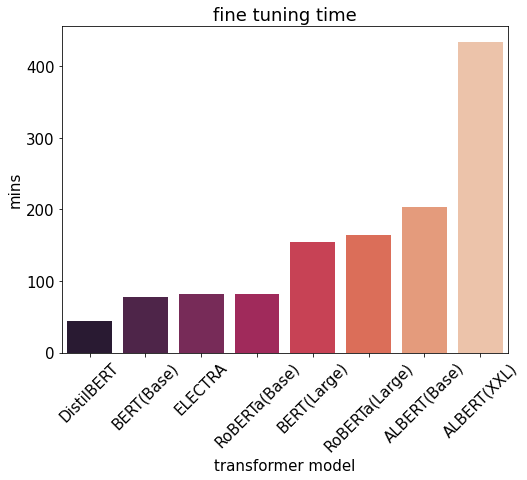

In [31]:
df.sort_values(by='fine_tuning_time', inplace=True)
fig = plt.figure(figsize=(8,6))
fig = sns.barplot(data=df, x='model_type', y='fine_tuning_time', palette="rocket")
fig.set_xlabel('transformer model')
fig.set_ylabel('mins')
fig.set_title('fine tuning time')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'DistilBERT'),
  Text(1, 0, 'BERT(Base)'),
  Text(2, 0, 'ELECTRA'),
  Text(3, 0, 'RoBERTa(Base)'),
  Text(4, 0, 'BERT(Large)'),
  Text(5, 0, 'RoBERTa(Large)'),
  Text(6, 0, 'ALBERT(Base)'),
  Text(7, 0, 'ALBERT(XXL)')])

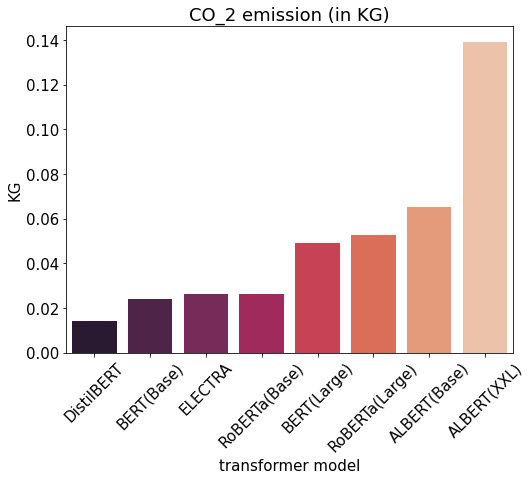

In [32]:
df.sort_values(by='co2_emission', inplace=True)
fig = plt.figure(figsize=(8,6))
fig = sns.barplot(data=df, x='model_type', y='co2_emission', palette="rocket")
fig.set_xlabel('transformer model')
fig.set_ylabel('KG')
fig.set_title('CO_2 emission (in KG)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'DistilBERT'),
  Text(1, 0, 'ELECTRA'),
  Text(2, 0, 'RoBERTa(Base)'),
  Text(3, 0, 'BERT(Base)'),
  Text(4, 0, 'BERT(Large)'),
  Text(5, 0, 'ALBERT(Base)'),
  Text(6, 0, 'RoBERTa(Large)'),
  Text(7, 0, 'ALBERT(XXL)')])

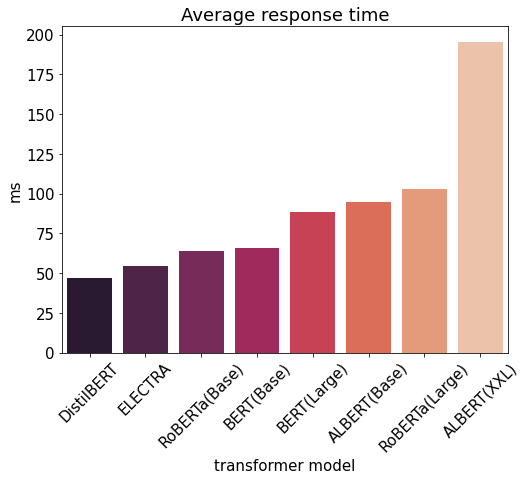

In [33]:
df.sort_values(by='average_response_time', inplace=True)
fig = plt.figure(figsize=(8,6))
fig = sns.barplot(data=df, x='model_type', y='average_response_time', palette="rocket")
fig.set_xlabel('transformer model')
fig.set_ylabel('ms')
fig.set_title('Average response time')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ALBERT(Base)'),
  Text(1, 0, 'DistilBERT'),
  Text(2, 0, 'RoBERTa(Base)'),
  Text(3, 0, 'BERT(Base)'),
  Text(4, 0, 'RoBERTa(Large)'),
  Text(5, 0, 'ELECTRA'),
  Text(6, 0, 'BERT(Large)'),
  Text(7, 0, 'ALBERT(XXL)')])

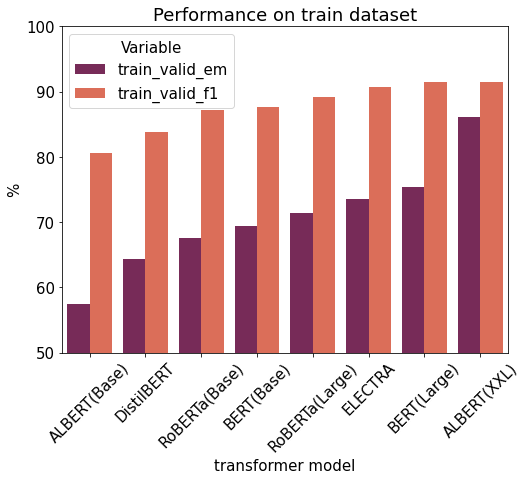

In [34]:
df.sort_values(by='train_valid_f1', inplace=True)
tidy_train = df[['model_type', 'train_valid_em', 'train_valid_f1']].melt(id_vars='model_type').rename(columns=str.title)

fig = plt.figure(figsize=(8,6))
fig = sns.barplot(data=tidy_train, x='Model_Type', y='Value', hue='Variable', palette='rocket')
fig.set_xlabel('transformer model')
fig.set_ylabel('%')
fig.set_title('Performance on train dataset')
fig.set_ylim((50,100))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'DistilBERT'),
  Text(1, 0, 'BERT(Base)'),
  Text(2, 0, 'BERT(Large)'),
  Text(3, 0, 'ALBERT(Base)'),
  Text(4, 0, 'ALBERT(XXL)'),
  Text(5, 0, 'RoBERTa(Base)'),
  Text(6, 0, 'RoBERTa(Large)'),
  Text(7, 0, 'ELECTRA')])

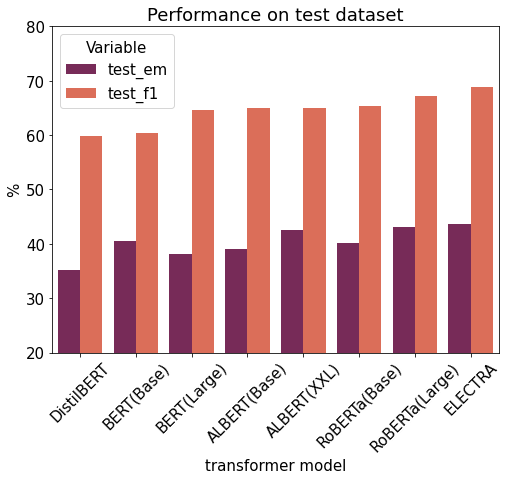

In [35]:
df.sort_values(by='test_f1', inplace=True)
tidy_test = df[['model_type', 'test_em', 'test_f1']].melt(id_vars='model_type').rename(columns=str.title)

fig = plt.figure(figsize=(8,6))
fig = sns.barplot(data=tidy_test, x='Model_Type', y='Value', hue='Variable', palette='rocket')
fig.set_xlabel('transformer model')
fig.set_ylabel('%')
fig.set_title('Performance on test dataset')
fig.set_ylim((20,80))
plt.xticks(rotation=45)